# IRIS DATA CLASSIFICATION

This notebook trains neural network to classify iris data. The notebook also shows the caviar search strategy for hyperparameter tuning, a technique is followed by machine learning scientists and engineers for training deep learning models.

**Import deep_learn package**

In [1]:
try:
    from deep_learn.nn import ann
    print("Imported deep_learn from enviroment site package")
except:
    from config import *
    append_path('../')
    from deep_learn.nn import ann
    print("Imported deep_learn by appending the path of the package to system path")

Imported deep_learn from enviroment site package


**Import neccessary packages**

In [2]:
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

## 1. Load and reshape data

**Load iris data**

In [3]:
iris = datasets.load_iris()

In [4]:
X = iris.data
y = iris.target.reshape(-1,1)

**Store the data in pandas dataframe**

In [5]:
# stack the X y data horizontally
data = np.hstack((X,y))
# store the numpy array in pandas dataframe
data = pd.DataFrame(data=data, columns=iris.feature_names +['species'])
# shuffle the data
data = data.sample(frac=1, random_state=1).reset_index(drop=True)

In [6]:
data.head(20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.8,4.0,1.2,0.2,0.0
1,5.1,2.5,3.0,1.1,1.0
2,6.6,3.0,4.4,1.4,1.0
3,5.4,3.9,1.3,0.4,0.0
4,7.9,3.8,6.4,2.0,2.0
5,6.3,3.3,4.7,1.6,1.0
6,6.9,3.1,5.1,2.3,2.0
7,5.1,3.8,1.9,0.4,0.0
8,4.7,3.2,1.6,0.2,0.0
9,6.9,3.2,5.7,2.3,2.0


**Features and output of the data**

In [7]:
features = iris.feature_names
output = 'species'

## 2. Preprocess the data for deep learning model

`Note:` I did not use a separate validation set in this excercise since the iris data contains only 150 examples. It is difficult to split such a small data into train, validation, and test sets. According to literature it is ok to leave out the validation set in such case. For such a small data K fold cross validation is a viable option; but K fold cross validation is used for normal machine learning algorithms, not deep learning algorithms. Deep learning algorithms works best in the big data regime, training deep learning models takes more time than training normal machine learning models. Hence, engineers do not use K fold cross validation for training deep learning models.

**Do a train test split**

In [8]:
train_data, test_data = train_test_split(data, test_size = 0.266, random_state = 1)

**A function to extract feature matrix and output vector**

In [9]:
def get_xy_data(dataframe, features = None, output = None):

    '''a function for parsing the feature matrix and output array from a pandas dataframe'''

    # to ignore pandas warning
    import warnings
    warnings.filterwarnings('ignore')

    # import numpy
    import numpy as np

    # if no featues are given then just return the a numpy matrix of the dataframe
    if features == None:
        return dataframe.as_matrix()

    # extract the feature matrix and convert it to numpy array
    X = dataframe[features].as_matrix()

    # if there is no output
    if output == None:
        return X
    # if the output vector is wanted by the user
    else:
        # extracting the output columns and converting it to numpy array
        y = dataframe[output].as_matrix()
        y = np.reshape(y, (-1,1))
        # returning the feature matrix and output vector
        return (X, y)

**Extract X y data for train and test set**

In [10]:
X_train, Y_train = get_xy_data(train_data, features=features, output=output)
X_test, Y_test = get_xy_data(test_data, features=features, output=output)

**Onehot encoding the y data**

In [11]:
encoder = OneHotEncoder()
Y_train = encoder.fit_transform(Y_train)
Y_train = Y_train.toarray()
Y_test = encoder.transform(Y_test)
Y_test = Y_test.toarray()

In [12]:
print(X_train.shape)
print(Y_train.shape)

(110, 4)
(110, 3)


In [13]:
print(X_test.shape)
print(Y_test.shape)

(40, 4)
(40, 3)


## 3. Train the first neural network for classification

Implementation of first neural network is a dirty implementation which allows machine learning engineers to test if the network along with its hyperparameters, architecture, and loss function actually works. After creating the dirty implementation engineers do hyperparameter tuning. Now the iris dataset is a very simple data to create a very accurate first implementation. Things will not be so easy for example creating a yolo object detection network for detecting vehicles, pedestrians, and road signs for self driving system.  

**Neural network architecture**

In [14]:
layers_dims = [4,4,8,8,4,3]

**Create a nn model object**

In [15]:
model = ann(layers_dims=layers_dims)

**Hyperparameters of the model**

In [16]:
batch_size = X_train.shape[0]
learning_rate = 0.1*.5
num_iterations = 40000

**Fit the model**

In [17]:
model.fit(X_train, Y_train, X_test, Y_test, batch_size,
          learning_rate = learning_rate, 
          num_iterations = num_iterations, print_cost=True, random_seed = 0)

Log loss after iteration 0: 1.141538
Log loss after iteration 100: 1.097231
Log loss after iteration 200: 1.101953
Log loss after iteration 300: 1.097959
Log loss after iteration 400: 1.095068
Log loss after iteration 500: 1.095910
Log loss after iteration 600: 1.096005
Log loss after iteration 700: 1.098199
Log loss after iteration 800: 1.102550
Log loss after iteration 900: 1.099853
Log loss after iteration 1000: 1.095382
Log loss after iteration 1100: 1.099318
Log loss after iteration 1200: 1.088701
Log loss after iteration 1300: 1.095299
Log loss after iteration 1400: 1.096558
Log loss after iteration 1500: 1.096727
Log loss after iteration 1600: 1.098543
Log loss after iteration 1700: 1.099408
Log loss after iteration 1800: 1.101593
Log loss after iteration 1900: 1.097817
Log loss after iteration 2000: 1.098948
Log loss after iteration 2100: 1.099111
Log loss after iteration 2200: 1.097732
Log loss after iteration 2300: 1.097172
Log loss after iteration 2400: 1.094945
Log loss aft

Log loss after iteration 20300: 0.027252
Log loss after iteration 20400: 0.056130
Log loss after iteration 20500: 0.085318
Log loss after iteration 20600: 0.017564
Log loss after iteration 20700: 0.032119
Log loss after iteration 20800: 0.050925
Log loss after iteration 20900: 0.021125
Log loss after iteration 21000: 0.034156
Log loss after iteration 21100: 0.032036
Log loss after iteration 21200: 0.107726
Log loss after iteration 21300: 0.089142
Log loss after iteration 21400: 0.018240
Log loss after iteration 21500: 0.024275
Log loss after iteration 21600: 0.020017
Log loss after iteration 21700: 0.015403
Log loss after iteration 21800: 0.105771
Log loss after iteration 21900: 0.060250
Log loss after iteration 22000: 0.100183
Log loss after iteration 22100: 0.169862
Log loss after iteration 22200: 0.052679
Log loss after iteration 22300: 0.051355
Log loss after iteration 22400: 0.046148
Log loss after iteration 22500: 0.109101
Log loss after iteration 22600: 0.027459
Log loss after i

**Plot of Cost vs Iteration**

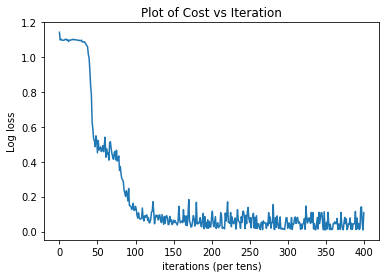

In [18]:
plt.plot(np.squeeze(model.costs))
plt.ylabel('Log loss')
plt.xlabel('iterations (per tens)')
plt.title("Plot of Cost vs Iteration")
plt.show()

## 4. Caviar Strategy for hyperparameter tuning

There are 2 strategies for deep learning hyperparamter tuning: 1) Panda strategy in which we babysit a single model, this is applicable if computing resource is limited 2) Caviar strategy in which we randomly initialize a number of hyperparameter settings and train neural network models using the different settings and then choose the one with the lowest error, this is strategy is applicable if we have enormous computing resource. In this notebook I will choose to tune the parameters of learning rate and nn architecture (# hidden layers, # hidden layer nodes) using caviar strategy.

**Function to randomly generate a given number of nn architectures**

In [19]:
def hidden_layer_and_node_generator(model_num, num_input, num_output, randome_seed = 0, low = 8, high=17):
    
    '''a function to randomly generate a given number of nn architectures'''
    
    # set the random seed
    np.random.seed(randome_seed)
    
    # list to store the architectures
    model_architecture_list = []
    
    # iterate given number of times
    for i in range(model_num):
        # randomly generate number of hidden layers
        num_hidden = np.random.randint(low = 3, high = 6)
        # randomly generate the number of nodes in each layer
        layers_dims = np.random.randint(low = low, high = high, size = num_hidden)
        layers_dims = layers_dims.tolist()
        # insert the input and output layer
        layers_dims.insert(0,num_input)
        layers_dims.append(num_output)
        # append the architecture to the designated list
        model_architecture_list.append(layers_dims)
    
    return model_architecture_list

**Create a list of learning rates to choose from**

In [20]:
learning_rates = np.round(np.linspace(0.1*0.5,0.1*5,num=200),4)
learning_rates

array([0.05  , 0.0523, 0.0545, 0.0568, 0.059 , 0.0613, 0.0636, 0.0658,
       0.0681, 0.0704, 0.0726, 0.0749, 0.0771, 0.0794, 0.0817, 0.0839,
       0.0862, 0.0884, 0.0907, 0.093 , 0.0952, 0.0975, 0.0997, 0.102 ,
       0.1043, 0.1065, 0.1088, 0.1111, 0.1133, 0.1156, 0.1178, 0.1201,
       0.1224, 0.1246, 0.1269, 0.1291, 0.1314, 0.1337, 0.1359, 0.1382,
       0.1405, 0.1427, 0.145 , 0.1472, 0.1495, 0.1518, 0.154 , 0.1563,
       0.1585, 0.1608, 0.1631, 0.1653, 0.1676, 0.1698, 0.1721, 0.1744,
       0.1766, 0.1789, 0.1812, 0.1834, 0.1857, 0.1879, 0.1902, 0.1925,
       0.1947, 0.197 , 0.1992, 0.2015, 0.2038, 0.206 , 0.2083, 0.2106,
       0.2128, 0.2151, 0.2173, 0.2196, 0.2219, 0.2241, 0.2264, 0.2286,
       0.2309, 0.2332, 0.2354, 0.2377, 0.2399, 0.2422, 0.2445, 0.2467,
       0.249 , 0.2513, 0.2535, 0.2558, 0.258 , 0.2603, 0.2626, 0.2648,
       0.2671, 0.2693, 0.2716, 0.2739, 0.2761, 0.2784, 0.2807, 0.2829,
       0.2852, 0.2874, 0.2897, 0.292 , 0.2942, 0.2965, 0.2987, 0.301 ,
      

**Function to randomly generate a given number of learning rates**

In [21]:
def learning_rate_generator(learning_rates, model_num, randome_seed = 0):
    
    '''a function to randomly generate a given number of learning rates'''
    
    np.random.seed(randome_seed)
    
    return np.random.choice(learning_rates, size=model_num).tolist()

**Function which implements a caviar strategy search**

In [22]:
def caviar_strategy_search(model_num, batch_size, model_directory, randome_seed = 0, num_iterations = 40000):
    
    '''a function which implements a caviar strategy search'''
    
    # randomly generate a list of learning rates
    learning_rate_list = learning_rate_generator(learning_rates, model_num, randome_seed = randome_seed)
    # randomly generate a list of architectures 
    model_architecture_list = hidden_layer_and_node_generator(model_num,4,3, randome_seed = randome_seed)
    # lists to store the costs and accuracy of models
    cost_list = []
    accuracy_list = []
    
    # iterate a given number of times
    for i in range(model_num):
        # create and fit a nn model with given architecture
        model = ann(layers_dims=model_architecture_list[i])
        model.fit(X_train, Y_train, X_test, Y_test, batch_size,
                  learning_rate = learning_rate_list[i], 
                  num_iterations = num_iterations, print_cost=False, random_seed = randome_seed)
        
        #pickling the model
        pickle_out = open(model_directory+"iris_model_"+str(i+1)+".mdl","wb")
        pickle.dump(model, pickle_out)
        pickle_out.close()
        
        # append the average of last 4 costs to the designated list
        cost_list.append(np.average(model.costs[-4:]))
        # append the accuracy to the designated list
        accuracy_list.append(model.accuracy)
        
        # print statement
        print("Completed training and collected results for the model:",str(i+1))
        
    return model_architecture_list, learning_rate_list, cost_list, accuracy_list

**Do a caviar strategy search of hyperparameters**

In [23]:
# number of models
model_num = 20
# batch size
batch_size = X_train.shape[0]
# random seed
randome_seed = 0

In [24]:
model_architecture_list, learning_rate_list, cost_list, accuracy_list = \
caviar_strategy_search(model_num, batch_size, './iris_models/',randome_seed = randome_seed)

Completed training and collected results for the model: 1
Completed training and collected results for the model: 2
Completed training and collected results for the model: 3
Completed training and collected results for the model: 4
Completed training and collected results for the model: 5
Completed training and collected results for the model: 6
Completed training and collected results for the model: 7
Completed training and collected results for the model: 8
Completed training and collected results for the model: 9
Completed training and collected results for the model: 10
Completed training and collected results for the model: 11
Completed training and collected results for the model: 12
Completed training and collected results for the model: 13
Completed training and collected results for the model: 14
Completed training and collected results for the model: 15
Completed training and collected results for the model: 16
Completed training and collected results for the model: 17
Comple

**Store the results in pandas dataframe**

In [25]:
results = pd.DataFrame({"model layers": model_architecture_list,
                        "learning rate": learning_rate_list,
                        "accuracy": accuracy_list,
                        "Log loss": cost_list})
results = results.reindex(columns=["model layers", "learning rate", "accuracy", "Log loss"])

**Show the results**

In [26]:
results

,model layers,learning rate,accuracy,Log loss
0,"[4, 13, 8, 11, 3]",0.4389,0.950,0.075639
1,"[4, 11, 13, 10, 12, 3]",0.1563,0.975,0.026402
2,"[4, 16, 16, 9, 14, 15, 3]",0.3146,0.975,0.017473
3,"[4, 16, 9, 13, 16, 12, 3]",0.4842,0.975,0.025969
4,"[4, 11, 13, 8, 3]",0.2015,0.950,0.032692
5,"[4, 11, 16, 9, 11, 11, 3]",0.4910,0.975,0.075492
6,"[4, 15, 8, 9, 8, 12, 3]",0.2829,0.925,0.017143
7,"[4, 10, 15, 10, 8, 8, 3]",0.0704,0.975,0.038651
8,"[4, 13, 13, 14, 3]",0.0975,0.975,0.022086
9,"[4, 12, 9, 12, 3]",0.1314,0.975,0.018482


It seems like many models are tied with accuracy. In such a case model with lowest cost should be selected.

## 5. Conclusion

I used caviar strategy search to tune just 2 parameters beaucse my neural network class is limited. However, this strategy can be used to tune other hyperparameters like activation function, dropout probability, regularization lamba parameter, and others. Engineers dont use grid search for hyperparameter tuning of deep learning models; the reason is it sometimes takes days and weeks to train a deep learning model, a grid search is just not feasible. Hence random search through hypermeter space is the most effective strategy, this is what caviar strategy does. The caviar strategy search has been encouraged by deep learning scientists like Prof Andrew Ng and Ian Goodfellow.